# Importando librera y DF

In [1]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np
from wordcloud import WordCloud #importo la función
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre
#!pip install wordcloud

In [2]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden

In [3]:
df=pd.read_excel('peru.xlsx')

In [4]:
df.groupby(["año"])["Resumen"].count()

año
2000     37
2001     58
2002     53
2003     90
2004     63
2005     45
2006     58
2007     32
2008     34
2009     60
2010     97
2011    106
2012    109
2013     96
2014     92
2015    104
2016    102
2017    118
2018    203
2019    151
2020     36
Name: Resumen, dtype: int64

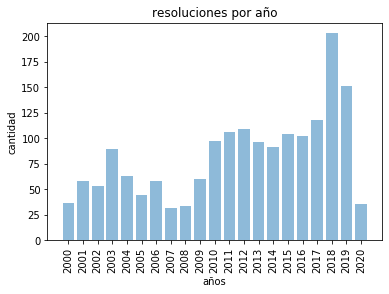

In [5]:
#Resoluciones por año
resoaño=df.groupby(["año"])["Resumen"].count()
plt.bar(resoaño.index,resoaño, align='center', alpha=0.5)
plt.xticks(resoaño.index, rotation="vertical")
plt.ylabel('cantidad')
plt.xlabel('años')
plt.title('resoluciones por año')
plt.show()

# Ajustando parámetros y análisis de datos


In [86]:
df=pd.read_excel('peru.xlsx')
#STOPWORDS
stop=[]
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')
#stop_words.append()

#numero de topicos óptimo
num_topics=4

#año
año=2005

#nombre
nombre=f"peru{año}.html"

In [87]:
df=df[df["año"]==año]

In [88]:
df

,Columna1,Resumen,año
304,Nº 093-2010-CD/OSIPTEL,Publicada en El Peruano : 20 de Agosto de 2010...,2005
305,N° 076-2006-CD/OSIPTEL,Publicada en El Peruano el: 03 de Diciembre de...,2005
306,N° 139-2017-CD/OSIPTEL,Publicado en el Diario Oficial El Peruano el d...,2005
307,Nº 056-2010-CD/OSIPTEL,Publicada en El Peruano : 18 de Junio de 2010M...,2005
308,Nº 018-2008-CD/OSIPTEL,Publicada en El Peruano el: 22 de Agosto de 20...,2005
309,Nº 025-2013-CD/OSIPTEL,Publicado en el Diario Oficial El Peruano el d...,2005
310,Nº 041-2008-CD/OSIPTEL,Publicada en Separata Especial El Peruano el: ...,2005
311,Nº 091-2014-CD/OSIPTEL,Publicado en el Diario Oficial El Peruano el d...,2005
312,Nº 086-2015-CD/OSIPTEL,Publicado en el Diario Oficial El Peruano el d...,2005
313,Nº 011-2014-CD/OSIPTEL,Publicado en el Diario Oficial El Peruano el d...,2005


## Preprocesamiento del texto
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [89]:
df.Resumen=df.Resumen.apply(str)
df.Resumen=df.Resumen.str.lower() 
#data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') 
df.Resumen=df.Resumen.str.replace('[0-9]', ' ') 
df.Resumen=df.Resumen.str.replace('reuters', '')
df.Resumen=df.Resumen.str.replace('regulación', '')
df.Resumen=df.Resumen.str.replace('resolución', '')
df.Resumen=df.Resumen.str.replace('factores', '')
df.Resumen=df.Resumen.str.replace('  +', ' ')
df.Resumen=df.Resumen.str.replace('said', '')
df.Resumen=df.Resumen.str.replace('dominicana', '') 
df.Resumen=df.Resumen.str.replace('republica', '') 
df.Resumen=df.Resumen.str.replace("usuarios", "usuario")
df.Resumen=df.Resumen.str.replace("ede", "")
df.Resumen=df.Resumen.str.replace("creg", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")

In [90]:
df

,Columna1,Resumen,año
304,Nº 093-2010-CD/OSIPTEL,publicada en el peruano : de agosto de revisió...,2005
305,N° 076-2006-CD/OSIPTEL,publicada en el peruano el: de diciembre de re...,2005
306,N° 139-2017-CD/OSIPTEL,publicado en el diario oficial el peruano el d...,2005
307,Nº 056-2010-CD/OSIPTEL,publicada en el peruano : de junio de modifica...,2005
308,Nº 018-2008-CD/OSIPTEL,publicada en el peruano el: de agosto de proye...,2005
309,Nº 025-2013-CD/OSIPTEL,publicado en el diario oficial el peruano el d...,2005
310,Nº 041-2008-CD/OSIPTEL,publicada en separata especial el peruano el: ...,2005
311,Nº 091-2014-CD/OSIPTEL,publicado en el diario oficial el peruano el d...,2005
312,Nº 086-2015-CD/OSIPTEL,publicado en el diario oficial el peruano el d...,2005
313,Nº 011-2014-CD/OSIPTEL,publicado en el diario oficial el peruano el d...,2005


In [91]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_words, ngram_range=(1,3), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(df.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario
tf = tf_vectorizer.fit_transform(df.Resumen.head(100)) # Aplico el objeto a un conjunto de texto

In [92]:
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [93]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
#print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

,administrado,administrado empresa,administrado empresa telefónica,agosto,ajuste,ajuste trimestral,ajuste trimestral tarifas,américa,américa móvil,américa móvil perú,...,uso,uso servicios,uso servicios públicos,usuario,veinte,viernes,viettel,único,único ordenado,único ordenado condiciones
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
#frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
#frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
#frecuencias.head(15)
#frecuencias.head(30).plot(kind='bar', figsize=(12,6))

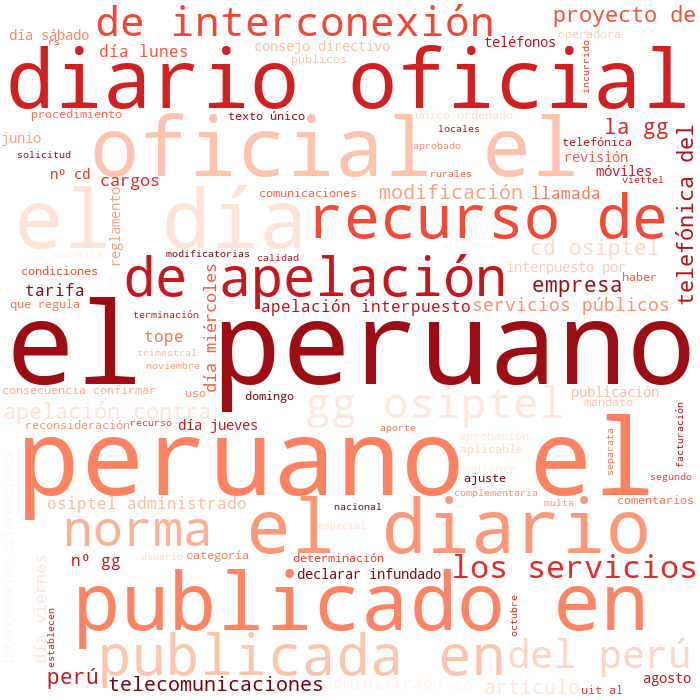

In [95]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(df.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO GENERAL - TODOS LOS AÑOS

In [96]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA
#print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

In [97]:
print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico


Topic #0:
peruano diciembre, diciembre, procedimientos, publicada, proyecto, calidad, separata, especial, usuario, locales, comunicaciones, nacional, reconsideración, recurso reconsideración, artículos

Topic #1:
oficial, peruano día, diario oficial peruano, oficial peruano, oficial peruano día, diario oficial, día, diario, publicado, publicado diario, publicado diario oficial, osiptel, recurso, apelación, perú

Topic #2:
publicada peruano, publicada, tope, cd, cd osiptel, modificación, teléfonos, servicios, osiptel, servicio, agosto, móviles, peruano agosto, publicada peruano agosto, proyecto modificación

Topic #3:
públicos, interconexión, servicios, servicios públicos, públicos telecomunicaciones, servicios públicos telecomunicaciones, norma, publicada peruano, telecomunicaciones, publicada, cargos, cargos interconexión, interconexión diferenciados, cargos interconexión diferenciados, diferenciados


## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

In [98]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,31,2)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
    print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
Wall time: 3.31 s


Text(0, 0.5, 'log-likelihood')

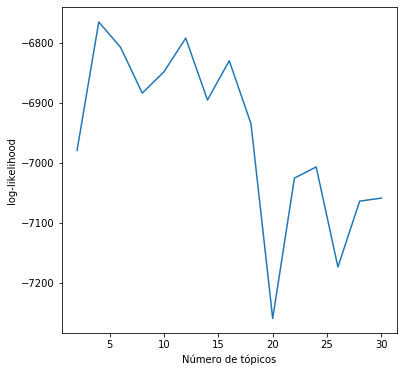

In [99]:
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')

## Visualización del LDA

In [100]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, nombre) # Guardo la visualización como html"""

C:\Users\Jorge Guerra\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [101]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook